In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
iris = sns.load_dataset("iris")
titanic = sns.load_dataset("titanic")

In [3]:
iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [4]:
titanic.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


##### 散布図行列

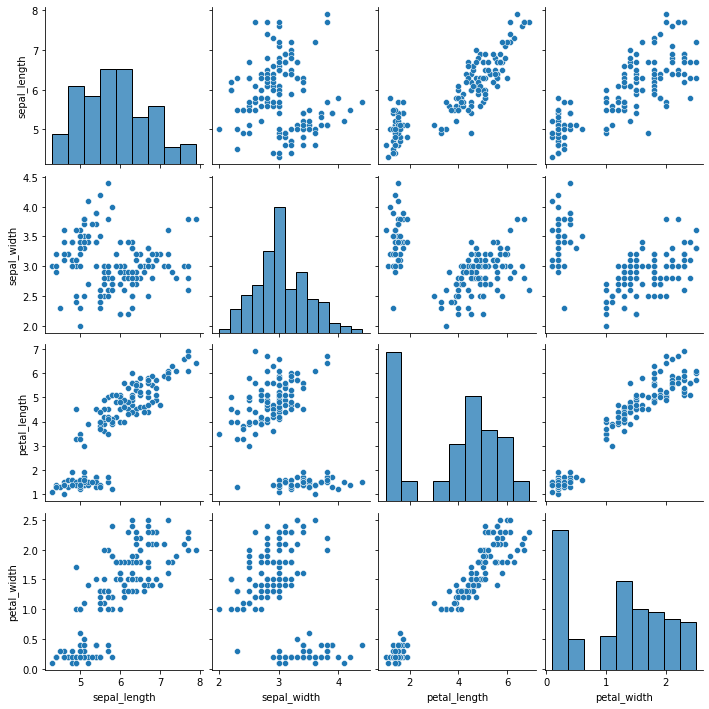

In [5]:
sns.pairplot(iris)

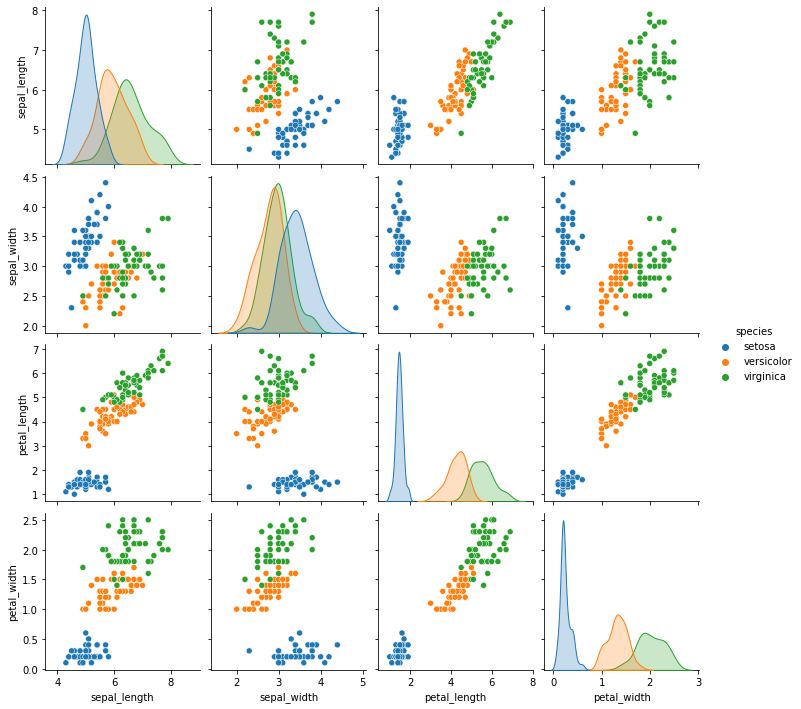

In [6]:
sns.pairplot(iris, hue="species")

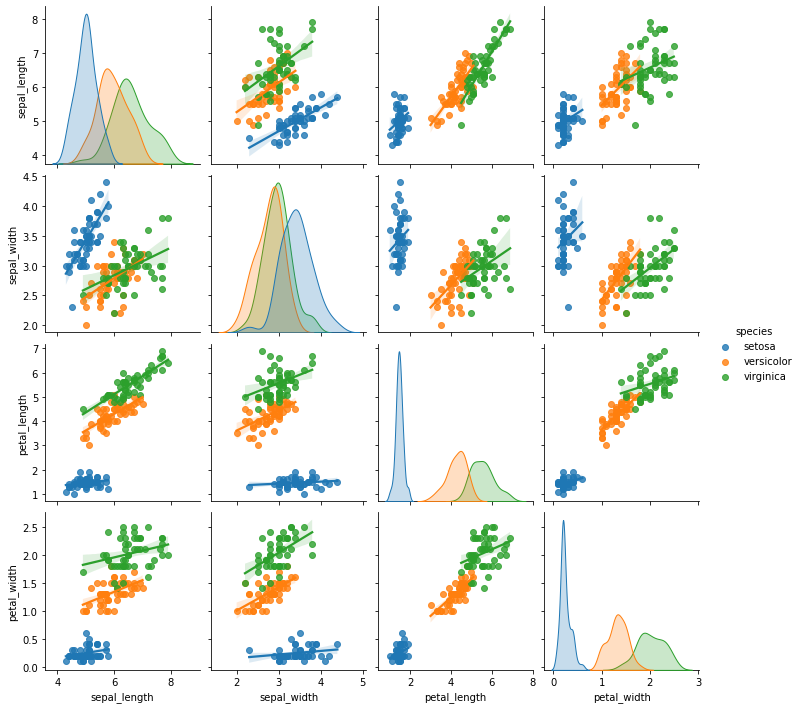

In [7]:
sns.pairplot(iris, hue="species", kind='reg')

##### 散布図

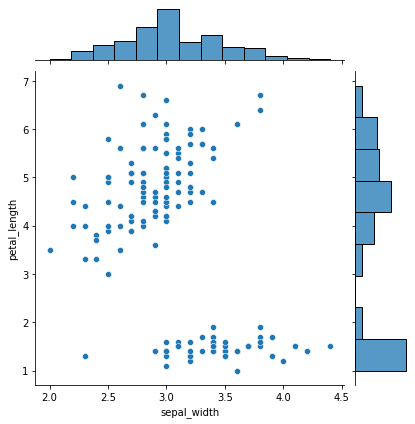

In [8]:
sns.jointplot(data=iris, x='sepal_width', y='petal_length')

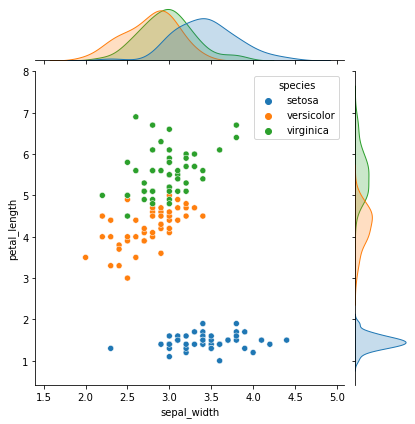

In [9]:
sns.jointplot(data=iris, x='sepal_width', y='petal_length', hue="species")

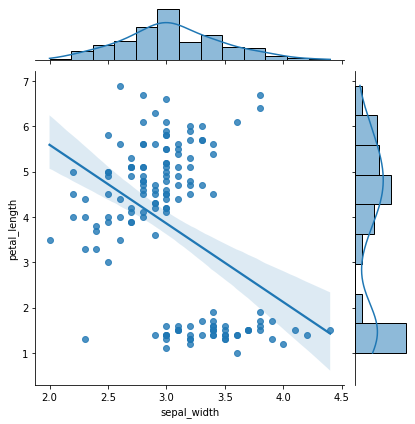

In [10]:
# 回帰直線
sns.jointplot(data=iris, x='sepal_width', y='petal_length', kind='reg')

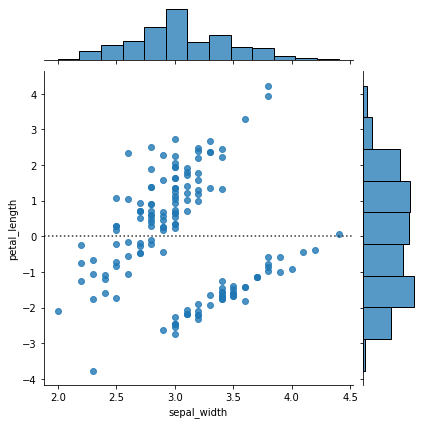

In [11]:
# 残差誤差
sns.jointplot(data=iris, x='sepal_width', y='petal_length', kind='resid')

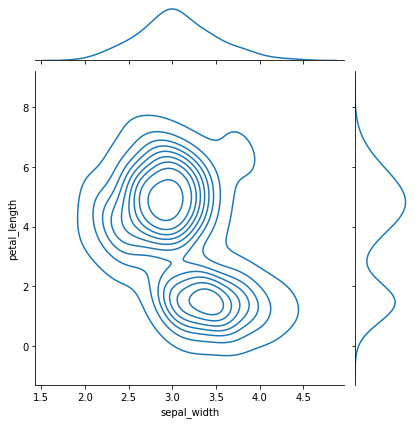

In [12]:
# カーネル密度推定
sns.jointplot(data=iris, x='sepal_width', y='petal_length', kind='kde')

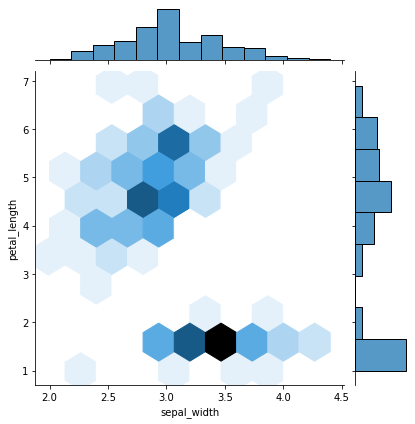

In [13]:
# ヒートマップ
sns.jointplot(data=iris, x='sepal_width', y='petal_length', kind='hex')

##### countplot

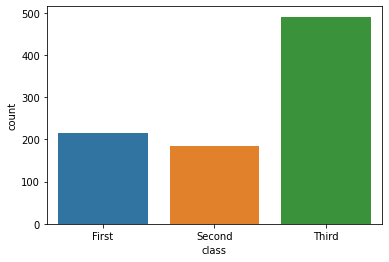

In [14]:
sns.countplot(data=titanic, x="class")

##### boxplot

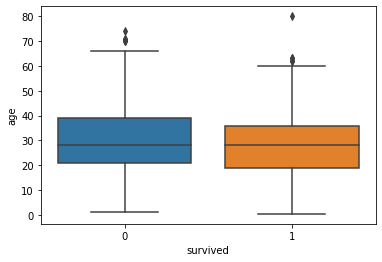

In [15]:
sns.boxplot(data=titanic, x="survived", y="age")

##### violinplot

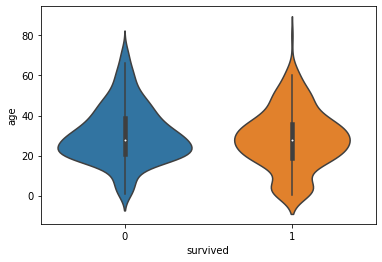

In [16]:
sns.violinplot(data=titanic, x="survived", y="age")

##### 棒グラフ

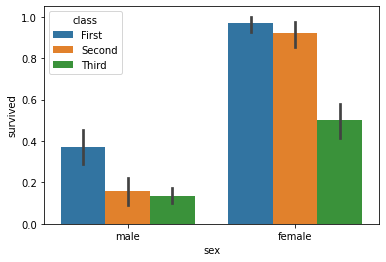

In [17]:
# 95%の信頼区間
sns.barplot(data=titanic, x="sex", y="survived", hue="class")

##### ヒストグラム

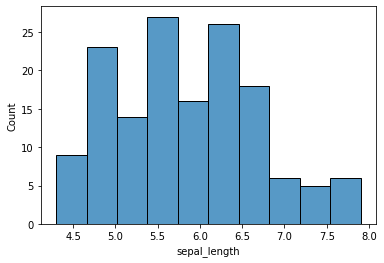

In [18]:
sns.histplot(data=iris, x='sepal_length', bins=10, kde=False)

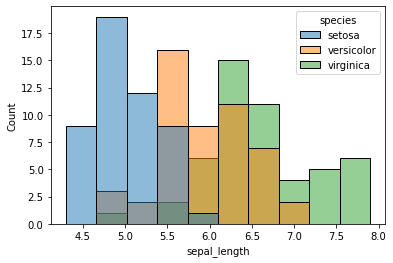

In [19]:
sns.histplot(data=iris, x='sepal_length', hue='species', bins=10, kde=False)

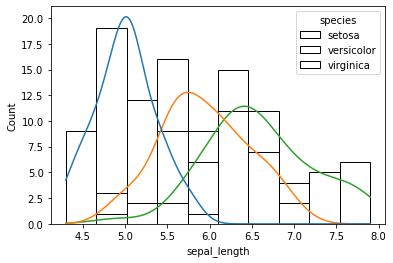

In [20]:
sns.histplot(data=iris, x='sepal_length', hue='species', bins=10, alpha=0, kde=True)

##### 相関図

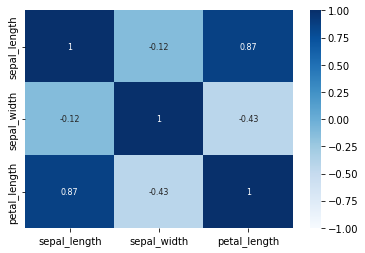

In [21]:
corr = iris[['sepal_length', 'sepal_width', 'petal_length']].corr(method='pearson')
sns.heatmap(corr, vmax=1, vmin=-1, center=0, annot=True, annot_kws={'size': 8}, cmap='Blues')

##### 複数グラフ

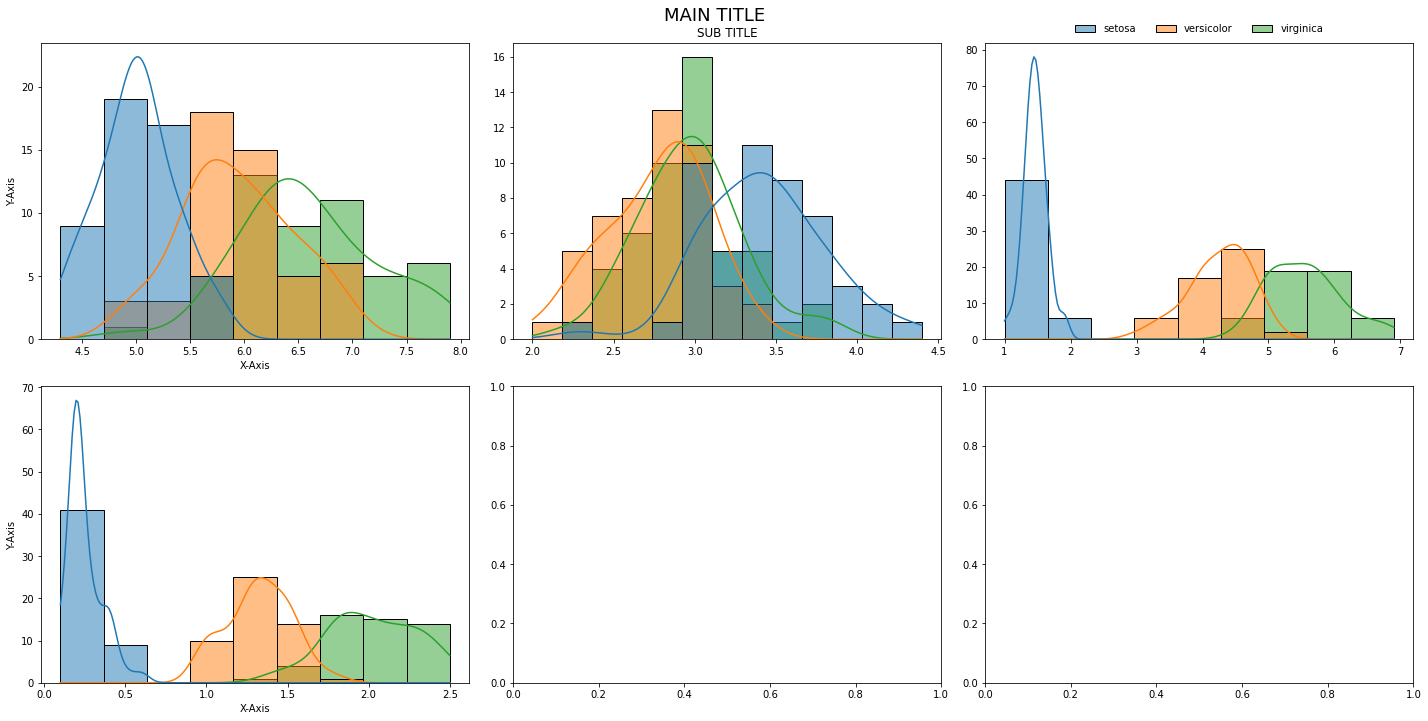

In [22]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10), tight_layout=True, facecolor="w")
axes = axes.ravel()

cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

for i, (col, ax) in enumerate(zip(cols, axes)):
  if i == 2:
    grid = sns.histplot(data=iris, x=col, hue='species', legend=True, kde=True, ax=ax)
    sns.move_legend(grid, "lower center",
                    bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False)
  else:
    grid = sns.histplot(data=iris, x=col, hue='species', legend=False, kde=True, ax=ax)

  if i == 1:
    grid.set_title("SUB TITLE")

  if i in [0,3]:
    grid.set(xlabel="X-Axis", ylabel="Y-Axis")
  else:
    grid.set(xlabel="", ylabel="")

fig.suptitle("MAIN TITLE", size=18, weight=2, x=.5, y=1)

sns.set(font_scale=1)
plt.subplots_adjust(wspace=0.2, hspace=0.2)
fig.savefig('img.png')

##### cmap

In [23]:
xs = np.arange(1, 10)
ys = np.arange(1, 10).reshape(9, 1)
m = xs * ys
df = pd.DataFrame(m)

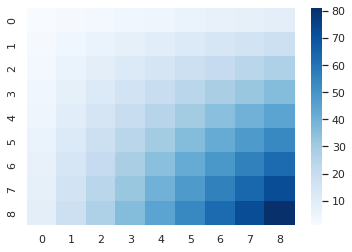

In [24]:
sns.heatmap(df, cmap='Blues')

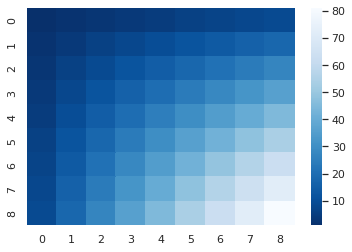

In [25]:
sns.heatmap(df, cmap='Blues_r')

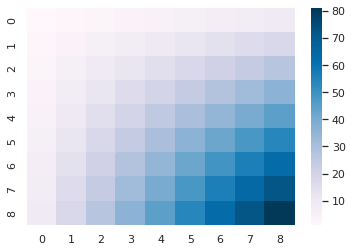

In [26]:
sns.heatmap(df, cmap='PuBu')

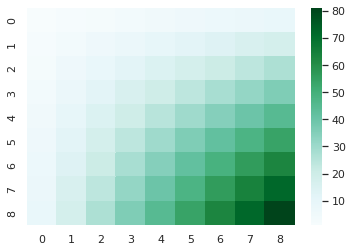

In [27]:
sns.heatmap(df, cmap='BuGn')

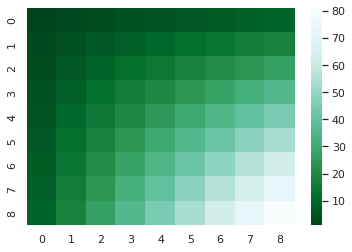

In [28]:
sns.heatmap(df, cmap='BuGn_r')

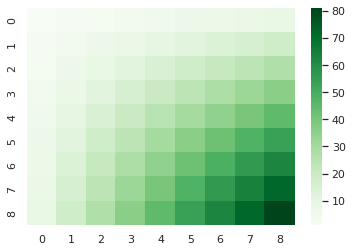

In [29]:
sns.heatmap(df, cmap='Greens')

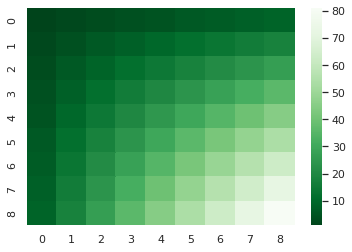

In [30]:
sns.heatmap(df, cmap='Greens_r')

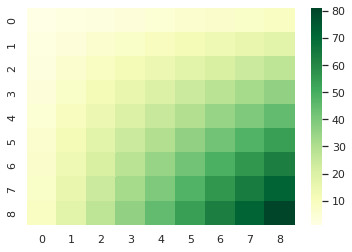

In [31]:
sns.heatmap(df, cmap='YlGn')

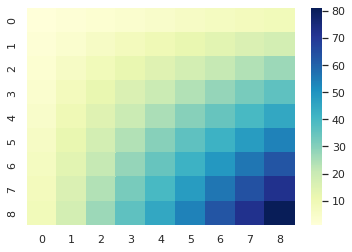

In [32]:
sns.heatmap(df, cmap='YlGnBu')

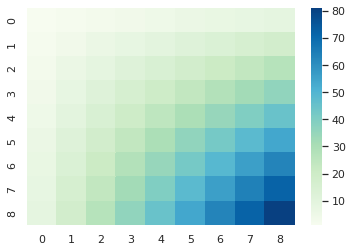

In [33]:
sns.heatmap(df, cmap='GnBu')

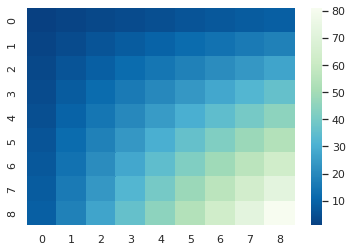

In [34]:
sns.heatmap(df, cmap='GnBu_r')

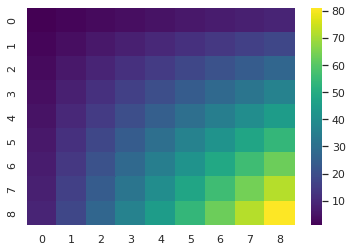

In [35]:
sns.heatmap(df, cmap='viridis')

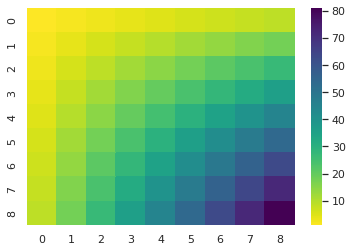

In [36]:
sns.heatmap(df, cmap='viridis_r')

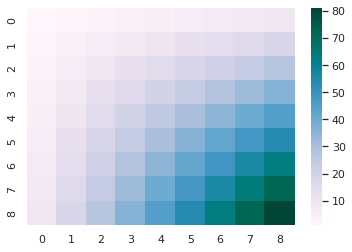

In [37]:
sns.heatmap(df, cmap='PuBuGn')

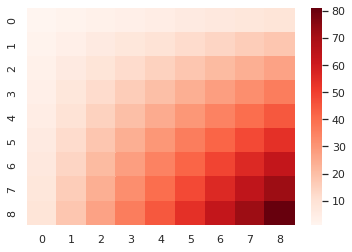

In [38]:
sns.heatmap(df, cmap='Reds')

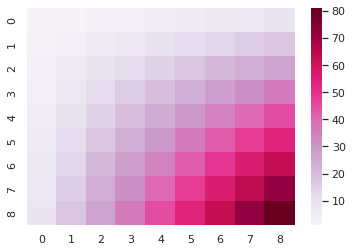

In [39]:
sns.heatmap(df, cmap='PuRd')

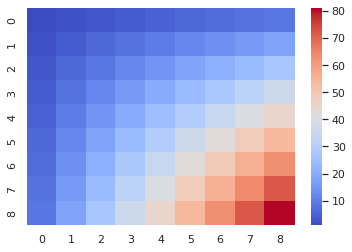

In [40]:
sns.heatmap(df, cmap='coolwarm')

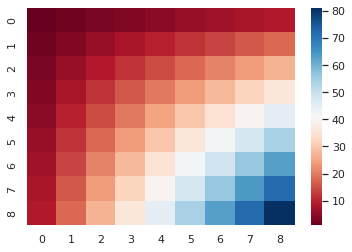

In [41]:
sns.heatmap(df, cmap='RdBu')

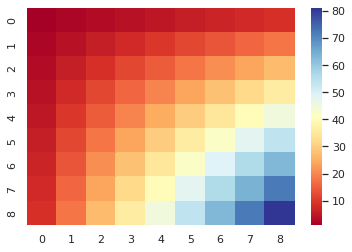

In [42]:
sns.heatmap(df, cmap='RdYlBu')

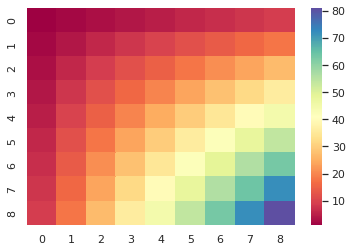

In [43]:
sns.heatmap(df, cmap='Spectral')

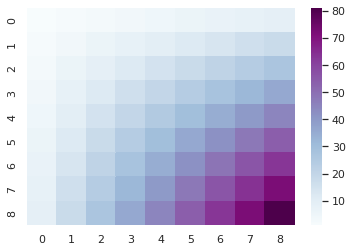

In [44]:
sns.heatmap(df, cmap='BuPu')

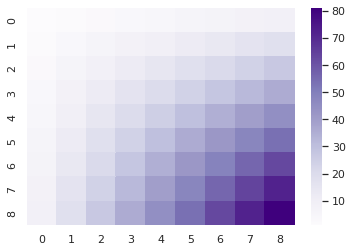

In [45]:
sns.heatmap(df, cmap='Purples')

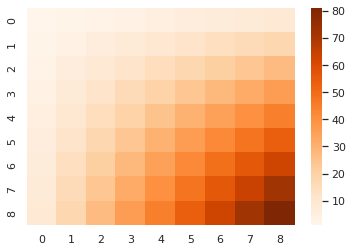

In [46]:
sns.heatmap(df, cmap='Oranges')

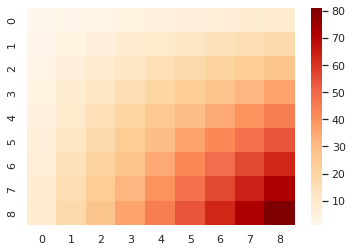

In [47]:
sns.heatmap(df, cmap='OrRd')

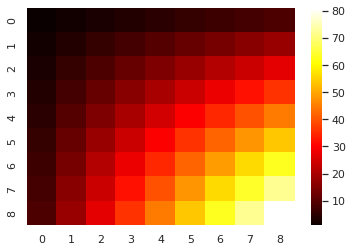

In [48]:
sns.heatmap(df, cmap='hot')

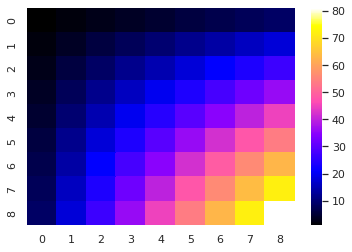

In [49]:
sns.heatmap(df, cmap='gnuplot2')

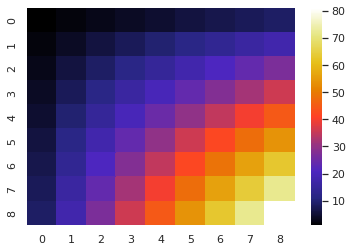

In [50]:
sns.heatmap(df, cmap='CMRmap')

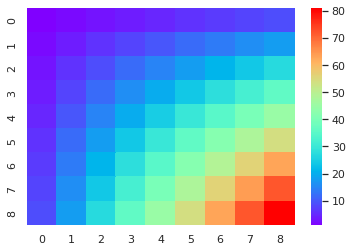

In [51]:
sns.heatmap(df, cmap='rainbow')

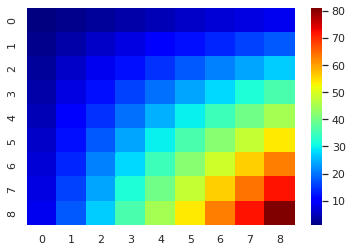

In [52]:
sns.heatmap(df, cmap='jet')

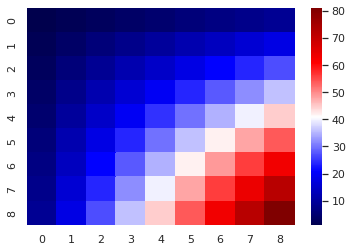

In [53]:
sns.heatmap(df, cmap='seismic')

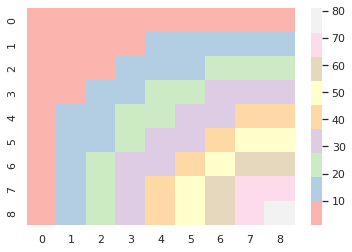

In [54]:
sns.heatmap(df, cmap='Pastel1')

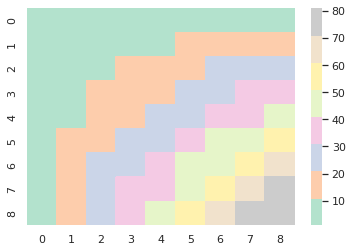

In [55]:
sns.heatmap(df, cmap='Pastel2')

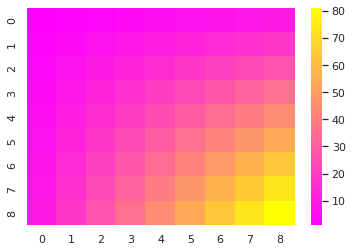

In [56]:
sns.heatmap(df, cmap='spring')

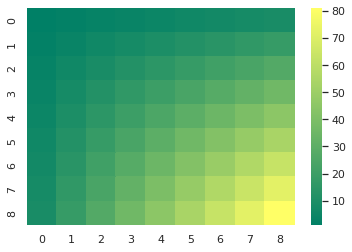

In [57]:
sns.heatmap(df, cmap='summer')

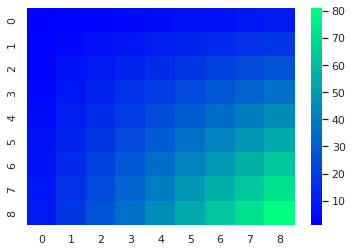

In [58]:
sns.heatmap(df, cmap='winter')